#Q1

##Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# data = pd.DataFrame({'Size (sq ft)': [1500, 2000, 1200, 1800, 2200, 1400, 1600, 2400, 1900, 1700],
#                      'Bedrooms': [3, 4, 2, 3, 4, 2, 3, 4, 3, 2],
#                      'Year Built': [1990, 1985, 2000, 1970, 1988, 1995, 2005, 1975, 1998, 1980],
#                      'Price (USD)': [250000, 300000, 200000, 275000, 350000, 225000, 275000, 400000, 325000, 250000]})

In [ ]:
dataset_Q1_url = 'https://raw.githubusercontent.com/Mohsin-Ali-Mirza/University/main/Sem6/Ai_Lab/lab10/Dataset_Q1.csv'
df1 = pd.read_csv(dataset_Q1_url)
df1

,Size (sq ft),Bedrooms,Year Built,Price (USD)
0,1500,3,1990,250000
1,2000,4,1985,300000
2,1200,2,2000,200000
3,1800,3,1970,275000
4,2200,4,1988,350000
5,1400,2,1995,225000
6,1600,3,2005,275000
7,2400,4,1975,400000
8,1900,3,1998,325000
9,1700,2,1980,250000


##Analyzing The Data

The results show that there is a high correlatoin between Size with Price and Bedrooms with Price as well. However the mean absolute error will be very big if this is directly calculated, therefore to ensure that all 3 values are on the same scale we will need to standardize the data.

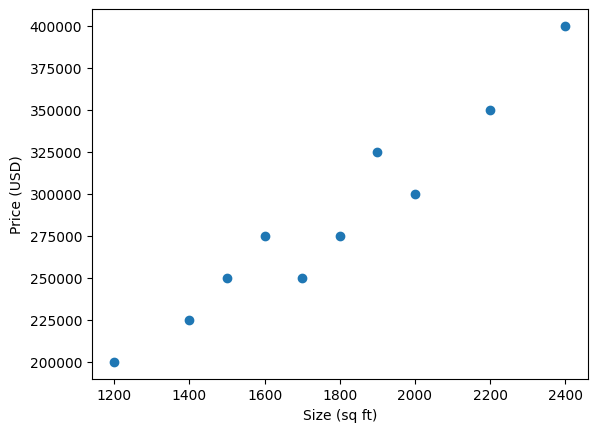

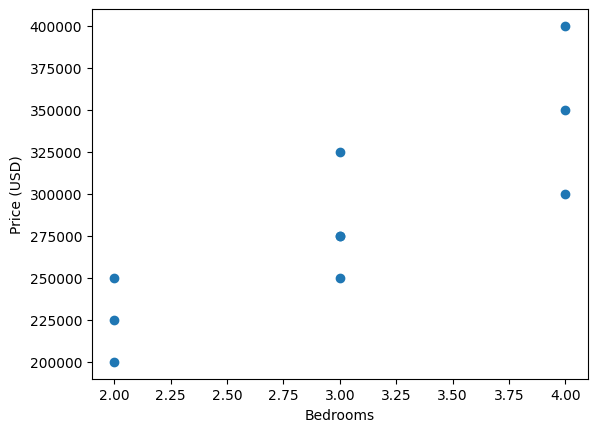

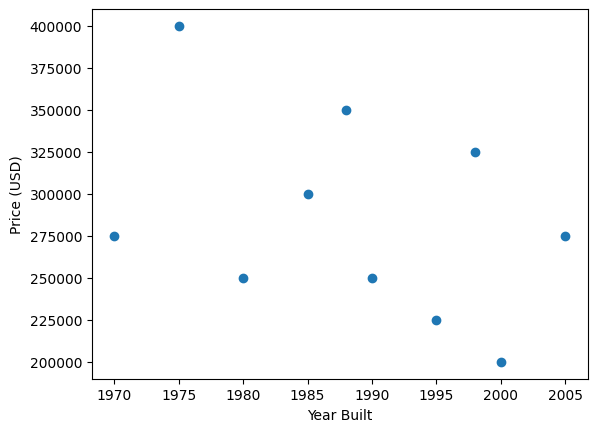

In [ ]:
import matplotlib.pyplot as plt


# plot the relationship between size and price
plt.scatter(df1['Size (sq ft)'], df1['Price (USD)'])
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (USD)')
plt.show()

# plot the relationship between bedrooms and price
plt.scatter(df1['Bedrooms'], df1['Price (USD)'])
plt.xlabel('Bedrooms')
plt.ylabel('Price (USD)')
plt.show()

# plot the relationship between year built and price
plt.scatter(df1['Year Built'],df1['Price (USD)'])
plt.xlabel('Year Built')
plt.ylabel('Price (USD)')
plt.show()

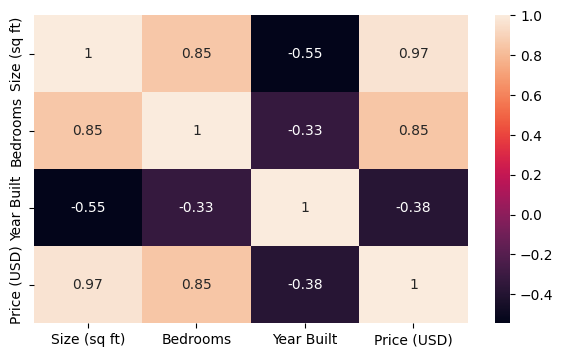

Bedrooms
2    225000.0
3    281250.0
4    350000.0
Name: Price (USD), dtype: float64


In [ ]:
import seaborn as sns

plt.figure(figsize=(7,4))
correlation = df1.corr()
sns.heatmap(data=correlation, annot=True)
plt.show()

price_by_bedrooms = df1.groupby('Bedrooms')['Price (USD)'].mean()
print(price_by_bedrooms)

##Standardize

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

# assume your data is stored in a variable called "data"
#X = df1.iloc[:, :-1] # select all columns except the last one as features
#y = df1.iloc[:, -1] # select the last column as the target variable
#X = df1.drop('Price (USD)', axis=1)
# if 1D X = df1_scaled['Size (sq ft)'].values.reshape(-1,1)

X = df1_scaled[['Size (sq ft)','Bedrooms']]
y = df1_scaled['Price (USD)'].values.reshape(-1,1)


##Split Data

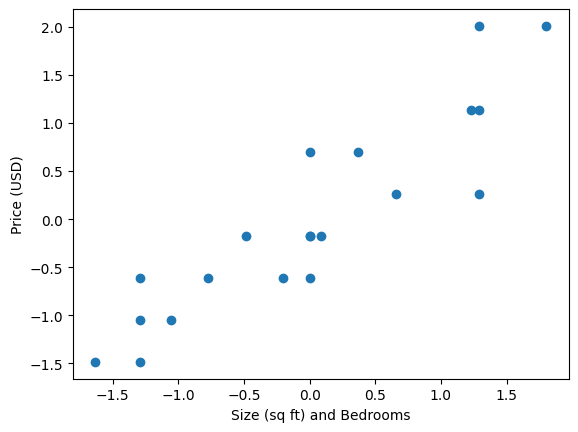

In [ ]:
# split the data into training and test sets with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = df1_scaled[['Size (sq ft)', 'Bedrooms']]
y = df1_scaled['Price (USD)'].values.reshape(-1, 1)

data_X = X.values
data_Y = np.tile(y, 2).reshape(-1, 1)

# plot the relationship between size and price
plt.scatter(data_X, data_Y)
plt.xlabel('Size (sq ft) and Bedrooms')
plt.ylabel('Price (USD)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


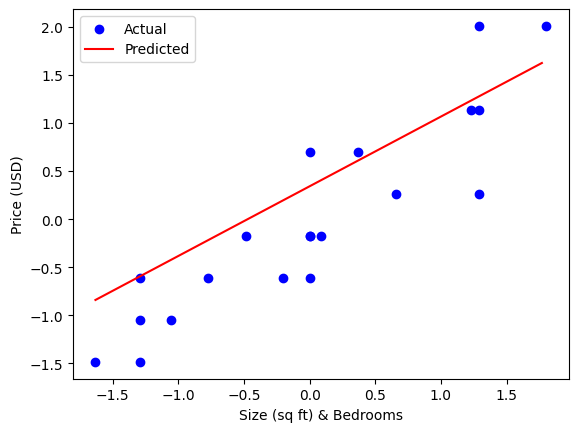

Mean Absolute error: 0.4038787010187499
R2 score: 0.6237466085583432


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Plot the scatter plot
plt.scatter(data_X, data_Y, color='blue', label='Actual')
plt.xlabel('Size (sq ft) & Bedrooms')
plt.ylabel('Price (USD)')

# Create a range of values for Size (sq ft) feature
x_range = np.arange(data_X.min(), data_X.max(), 0.1).reshape(-1, 1)
y_range_pred = model.predict(np.concatenate((x_range, np.ones_like(x_range)), axis=1))
# Plot the line plot
plt.plot(x_range, y_range_pred, color='red', label='Predicted')
plt.legend()
plt.show()

y_pred = model.predict(X_test)  # make predictions
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute error:', mse)
print('R2 score:', r2)

#Q2

##Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset_Q2_url = 'https://raw.githubusercontent.com/Mohsin-Ali-Mirza/University/main/Sem6/Ai_Lab/lab10/Dataset_Q2.csv'
df2 = pd.read_csv(dataset_Q2_url)
df2

,Customer ID,Age,Gender,Location,Monthly Charges,Internet Service,Phone Service,TV Service,Churn
0,1,35,Male,NY,50,Fiber optic,Yes,Yes,Yes
1,2,44,Female,CA,70,DSL,Yes,No,No
2,3,22,Male,TX,30,DSL,Yes,No,Yes
3,4,55,Female,NY,80,Fiber optic,Yes,Yes,No
4,5,33,Male,CA,45,DSL,Yes,No,No
5,6,20,Female,TX,25,DSL,Yes,No,Yes
6,7,68,Male,NY,100,Fiber optic,Yes,Yes,Yes
7,8,50,Female,CA,60,DSL,Yes,No,No
8,9,27,Male,TX,35,DSL,Yes,No,No
9,10,41,Female,NY,90,Fiber optic,Yes,Yes,Yes


## Convert Categorical Data To Numeric Data

In [ ]:
categorical_cols = df2.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])

df2

,Customer ID,Age,Gender,Location,Monthly Charges,Internet Service,Phone Service,TV Service,Churn
0,1,35,1,1,50,1,0,1,1
1,2,44,0,0,70,0,0,0,0
2,3,22,1,2,30,0,0,0,1
3,4,55,0,1,80,1,0,1,0
4,5,33,1,0,45,0,0,0,0
5,6,20,0,2,25,0,0,0,1
6,7,68,1,1,100,1,0,1,1
7,8,50,0,0,60,0,0,0,0
8,9,27,1,2,35,0,0,0,0
9,10,41,0,1,90,1,0,1,1


##Standardize

In [ ]:
# Scale the numeric features using StandardScaler or MinMaxScaler

num_cols = ['Age', 'Monthly Charges']
scaler = StandardScaler()
df2_scaled = df2
df2_scaled[num_cols] = pd.DataFrame(scaler.fit_transform(df2[num_cols]), columns=num_cols)
df2_scaled

,Customer ID,Age,Gender,Location,Monthly Charges,Internet Service,Phone Service,TV Service,Churn
0,1,-0.311234,1,1,-0.345503,1,0,1,1
1,2,0.311234,0,0,0.467445,0,0,0,0
2,3,-1.210356,1,2,-1.158450,0,0,0,1
3,4,1.072029,0,1,0.873919,1,0,1,0
4,5,-0.449561,1,0,-0.548740,0,0,0,0
5,6,-1.348682,0,2,-1.361687,0,0,0,1
6,7,1.971150,1,1,1.686866,1,0,1,1
7,8,0.726213,0,0,0.060971,0,0,0,0
8,9,-0.864540,1,2,-0.955214,0,0,0,0
9,10,0.103745,0,1,1.280393,1,0,1,1


In [ ]:
X = df2_scaled.drop(columns=['Customer ID','Churn','Phone Service'])
y = df2_scaled.iloc[:,-1]

##Spliting The Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

##Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=42)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)


0.6666666666666666


Question:
How is decision tree working like is it automatically detecting which feature is important which is not?


#Q3

##Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset_Q3_url = 'https://raw.githubusercontent.com/Mohsin-Ali-Mirza/University/main/Sem6/Ai_Lab/lab10/Dataset_Q3.csv'
df3 = pd.read_csv(dataset_Q3_url)
df3

,ID,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,1,5.1,3.5,1.4,0.2,Iris setosa
1,2,4.9,3.0,1.4,0.2,Iris setosa
2,3,4.7,3.2,1.3,0.2,Iris setosa
3,4,7.0,3.2,4.7,1.4,Iris versicolor
4,5,6.4,3.2,4.5,1.5,Iris versicolor
5,6,6.9,3.1,4.9,1.5,Iris versicolor
6,7,6.5,3.0,5.2,2.0,Iris virginica
7,8,6.2,3.4,5.4,2.3,Iris virginica
8,9,5.9,3.0,5.1,1.8,Iris virginica


## Standardize

In [ ]:
# scaler = StandardScaler()
# num_cols = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
# df3_scaled = df3
# df3_scaled[num_cols] = pd.DataFrame(scaler.fit_transform(df3[num_cols]),columns=num_cols)
# print(df3_scaled)

X = df3.iloc[:,1:-1]
y = df3.iloc[:,-1]

## Split Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## KNN Algorithim

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#Odd Points so take square root of 9 and always take odd points i.e sqrt(144)=12 but take 11
#What is n_jobs=-1
#what is the plot showing?
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


score = accuracy_score(y_test, y_pred)
mat = confusion_matrix(y_pred, y_test)
print('Score:', score)
print(mat)

Score: 1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]


<Axes: xlabel='Sepal Length', ylabel='Petal Width'>

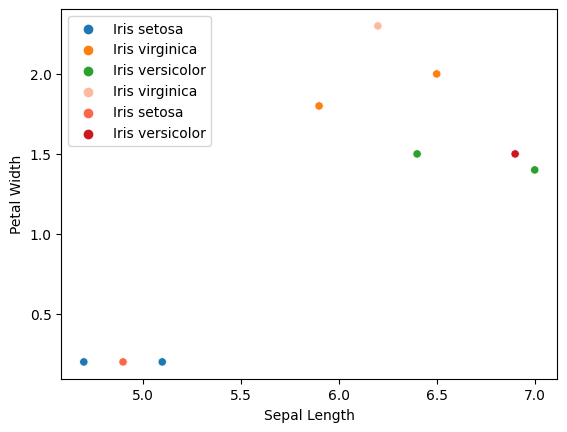

In [ ]:
sns.scatterplot(data=x_train, x='Sepal Length', y='Petal Width', hue=y_train)
sns.scatterplot(data=x_test, x='Sepal Length', y='Petal Width',  hue=y_pred, palette='Reds')

#Q4

#Libaries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_Q4_url = 'https://raw.githubusercontent.com/Mohsin-Ali-Mirza/University/main/Sem6/Ai_Lab/lab10/Dataset_Q4.csv'
df4 = pd.read_csv(dataset_Q4_url)

#inplace?
df4.drop(columns='ID',inplace=True)
print(df4)

   Amount Location   Time Fraudulent
0   100.0      USA  08:15         No
1   200.0   Canada  13:45         No
2    50.0      USA  19:30        Yes
3    75.0   Mexico  11:00         No
4   300.0      USA  15:20        Yes
5   150.0      USA  22:00        Yes
6    25.0   Canada  09:00         No
7   500.0   Mexico  17:30        Yes
8    80.0      USA  14:00         No


## Preprocessing and Analyzing

In [ ]:
cat_cols = df4.select_dtypes(include=['object'])

for col in cat_cols:
    enc = LabelEncoder()
    df4[col] = enc.fit_transform(df4[col])

  Location   Time Fraudulent
0      USA  08:15         No
1   Canada  13:45         No
2      USA  19:30        Yes
3   Mexico  11:00         No
4      USA  15:20        Yes
5      USA  22:00        Yes
6   Canada  09:00         No
7   Mexico  17:30        Yes
8      USA  14:00         No


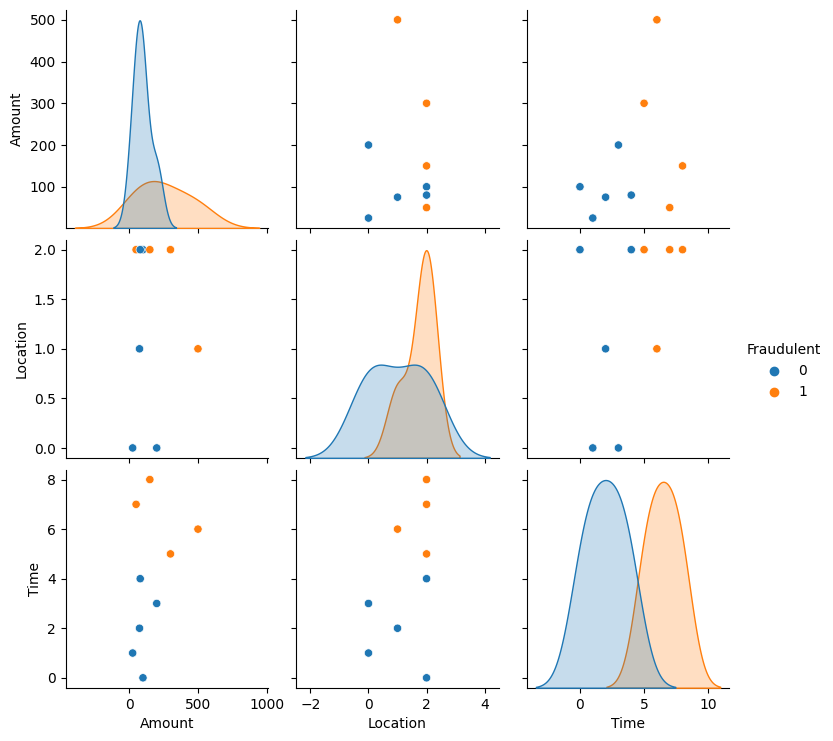

In [ ]:
sns.pairplot(df4,hue='Fraudulent')

## Split Data

In [ ]:
X = df4.drop(columns=['Fraudulent'])
y = df4['Fraudulent']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## SVM Vector

In [ ]:
from sklearn.svm import SVC

#what is c=?
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


#Q5

#Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_Q5_url = 'https://raw.githubusercontent.com/Mohsin-Ali-Mirza/University/main/Sem6/Ai_Lab/lab10/Dataset_Q5.csv'
df5 = pd.read_csv(dataset_Q5_url)
df5 = df5.drop(columns='Customer ID')
print(df5)

In [ ]:
cat_cols = df5.select_dtypes(include=['object'])

for col in cat_cols:
    enc = LabelEncoder()
    df5[col] = enc.fit_transform(df5[col])

In [ ]:
X = df5.drop(columns=[' Items Purchased'])

from sklearn.cluster import KMeans

plt.figure(figsize=(5,5))
wss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init='k-means++' ,random_state=42)
    kmeans.fit_predict(X)
    wss.append(kmeans.inertia_)

plt.plot(range(1,6),wss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    print(f"for cluster {i}: The Score is {score}")

In [ ]:
km = KMeans(n_clusters=6, init='k-means++')
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


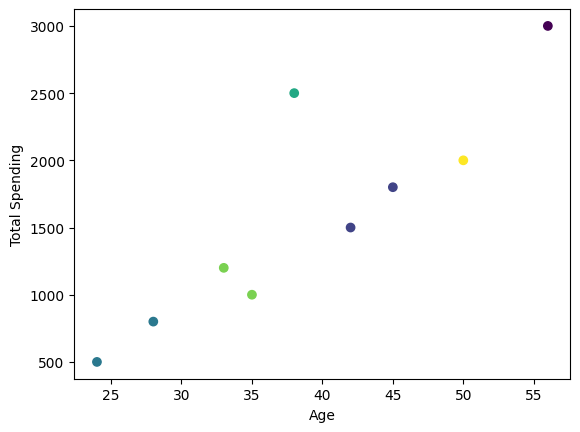

In [ ]:

plt.scatter(X.loc[:,' Age'], X.loc[:,' Total Spending'], c=km.labels_)

plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()